In [37]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
test=pd.read_csv("test_Loanpredict.csv")
train=pd.read_csv("train_Loanpredict.csv")

In [4]:
train.shape

(614, 13)

In [5]:
test.shape

(367, 12)

In [6]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [8]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 316.6 KB


In [12]:
test.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 168.3 KB


In [15]:
test['CoapplicantIncome'].dtype

dtype('int64')

In [16]:
test['CoapplicantIncome']=test['CoapplicantIncome'].astype('float64')

In [17]:
test.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    float64
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 168.3 KB


In [18]:
train['source']='train'
test['source']='test'

In [19]:
train.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,source
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,train


In [20]:
test.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,source
0,LP001015,Male,Yes,0,Graduate,No,5720,0.0,110.0,360.0,1.0,Urban,test
1,LP001022,Male,Yes,1,Graduate,No,3076,1500.0,126.0,360.0,1.0,Urban,test
2,LP001031,Male,Yes,2,Graduate,No,5000,1800.0,208.0,360.0,1.0,Urban,test


In [24]:
df=pd.concat([train,test])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,source
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,train
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,train
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN,test
363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN,test
364,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN,test
365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN,test


### EDA

In [138]:
df['Credit_History'].value_counts()

1.0    830
0.0    148
Name: Credit_History, dtype: int64

In [35]:
num_columns=df.select_dtypes(np.number)
cate_columns=df.select_dtypes(exclude=np.number).drop(columns=['Loan_Status','Loan_ID','source'])
cate_columns

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural
2,Male,Yes,0,Graduate,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Urban
4,Male,No,0,Graduate,No,Urban
...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,Urban
363,Male,Yes,0,Graduate,No,Urban
364,Male,No,0,Graduate,No,Semiurban
365,Male,Yes,0,Graduate,No,Rural


In [34]:
cate_columns.isna().sum()

Gender           24
Married           3
Dependents       25
Education         0
Self_Employed    55
Property_Area     0
source            0
dtype: int64

In [67]:
cate_columns.groupby(['Property_Area','Education']).count()

Gender  Married  Dependents  Self_Employed
Property_Area Education                                               
Rural         Graduate         213      216         214            204
              Not Graduate      70       74          73             68
Semiurban     Graduate         264      272         265            261
              Not Graduate      74       75          73             71
Urban         Graduate         267      272         264            255
              Not Graduate      69       69          67             67

In [77]:
df['Gender']=df.groupby(by=['Property_Area','Education'])['Gender'].transform(lambda x:x.fillna(x.mode()[0]))
df['Married']=df.groupby(by=['Property_Area','Education'])['Married'].transform(lambda x:x.fillna(x.mode()[0]))
df['Dependents']=df.groupby(by=['Property_Area','Education'])['Dependents'].transform(lambda x:x.fillna(x.mode()[0]))
df['Self_Employed']=df.groupby(by=['Property_Area','Education'])['Self_Employed'].transform(lambda x:x.fillna(x.mode()[0]))


In [81]:
df[['Gender','Married','Dependents','Self_Employed']].isna().sum()

Gender           0
Married          0
Dependents       0
Self_Employed    0
dtype: int64

In [82]:
num_columns

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
362,4009,1777.0,113.0,360.0,1.0
363,4158,709.0,115.0,360.0,1.0
364,3250,1993.0,126.0,360.0,NaN
365,5000,2393.0,158.0,360.0,1.0


In [83]:
num_columns.isna().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
dtype: int64

<AxesSubplot:>

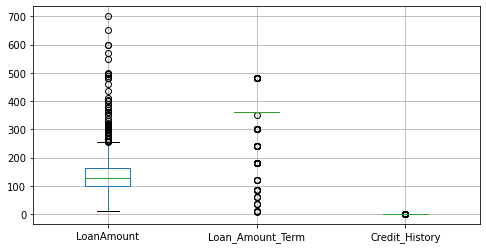

In [91]:
plt.subplots(figsize=(8,4))
plt.rcParams.update({'font.size':10})
num_columns.boxplot(column=['LoanAmount','Loan_Amount_Term','Credit_History'])

In [92]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,source
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,train
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,train
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,train


In [93]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']

In [96]:
df.drop(columns=['ApplicantIncome','CoapplicantIncome'],inplace=True)

In [97]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,source,TotalIncome
0,LP001002,Male,No,0,Graduate,No,NaN,360.0,1.0,Urban,Y,train,5849.0
1,LP001003,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,train,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,train,3000.0


In [101]:
group_a=df.groupby(by=['Gender','Married','Education','Self_Employed','Property_Area'])

In [143]:
df['LoanAmount']=group_a['LoanAmount'].transform(lambda x: x.fillna(x.median()))
df['Loan_Amount_Term']=group_a['Loan_Amount_Term'].transform(lambda x: x.fillna(x.median()))

In [145]:
df['Credit_History']=df.groupby(by=['Gender','Married','Education','Self_Employed','Property_Area'])['Credit_History'].transform(lambda x: x.fillna(x.mode()[0]))

In [146]:
df['Credit_History'].isna().sum()

0

<AxesSubplot:>

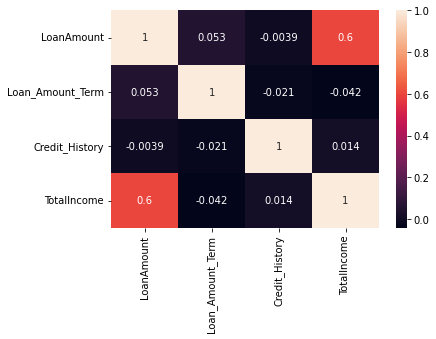

In [147]:
corr_ = df.corr()
sns.heatmap(corr_,annot=True)

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [150]:
X=df.select_dtypes(np.number)

In [151]:
vif_data = pd.DataFrame()
vif_data['feature']=X.columns
vif_data

,feature
0,LoanAmount
1,Loan_Amount_Term
2,Credit_History
3,TotalIncome


In [154]:
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,LoanAmount,6.835876
1,Loan_Amount_Term,7.854309
2,Credit_History,5.562236
3,TotalIncome,3.543827


In [157]:
df_category=df.select_dtypes(exclude=np.number).drop(columns=['Loan_ID','source','Loan_Status'])
df_category

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural
2,Male,Yes,0,Graduate,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Urban
4,Male,No,0,Graduate,No,Urban
...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,Urban
363,Male,Yes,0,Graduate,No,Urban
364,Male,No,0,Graduate,No,Semiurban
365,Male,Yes,0,Graduate,No,Rural


In [167]:
df_category_encode=pd.get_dummies(df_category)
df_category_encode

,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
363,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
364,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0
365,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0


In [161]:
df_numbers = df.select_dtypes(include=np.number)

In [171]:
df=pd.concat([df_numbers,df_category_encode,df[['Loan_ID','source','Loan_Status']]],axis=1)

In [172]:
df.to_csv("df_final.csv",index = False)

### Logistic Model

In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [176]:
df_model = pd.read_csv("df_final.csv")
df_model.head()

,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,...,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_ID,source,Loan_Status
0,113.0,360.0,1.0,5849.0,0,1,1,0,1,0,...,1,0,1,0,0,0,1,LP001002,train,Y
1,128.0,360.0,1.0,6091.0,0,1,0,1,0,1,...,1,0,1,0,1,0,0,LP001003,train,N
2,66.0,360.0,1.0,3000.0,0,1,0,1,1,0,...,1,0,0,1,0,0,1,LP001005,train,Y
3,120.0,360.0,1.0,4941.0,0,1,0,1,1,0,...,0,1,1,0,0,0,1,LP001006,train,Y
4,141.0,360.0,1.0,6000.0,0,1,1,0,1,0,...,1,0,1,0,0,0,1,LP001008,train,Y


In [177]:
train_model = df_model.loc[df_model['source']=='train']
test_model = df_model.loc[df_model['source']=='test']

In [179]:
X_train  = train_model.drop(columns=['Loan_ID','Loan_Status','source'])
Y_train = train_model['Loan_Status']

In [180]:
model  = LogisticRegression()
model.fit(X_train,Y_train)
y_predict = model.predict(X_train)
print("Accuracy:",accuracy_score(Y_train,y_predict))

Accuracy: 0.8078175895765473


/Users/kishore/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [181]:
confusion_matrix(Y_train,y_predict)

array([[ 83, 109],
       [  9, 413]])

In [182]:
target = ['approve','notapprove']
print(classification_report(Y_train,y_predict,target_names=target))

              precision    recall  f1-score   support

     approve       0.90      0.43      0.58       192
  notapprove       0.79      0.98      0.87       422

    accuracy                           0.81       614
   macro avg       0.85      0.71      0.73       614
weighted avg       0.83      0.81      0.78       614



/Users/kishore/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

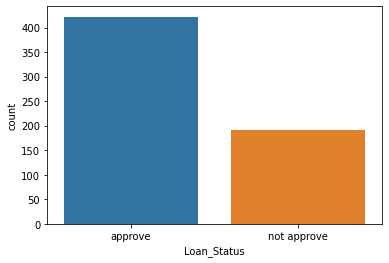

In [183]:
g = sns.countplot(train_model['Loan_Status'])
g.set_xticklabels(['approve','not approve'])
plt.show

In [184]:
X_test  = test_model.drop(columns=['Loan_ID','Loan_Status','source'])
Y_test= test_model['Loan_Status']

In [185]:
Y_pred_test = model.predict(X_test)

In [186]:
X_test['Predicted'] = Y_pred_test
X_test['Predicted'].shape

(367,)

In [205]:
Sample=pd.read_csv('sample_submission.csv')
Sample

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N


In [208]:
Sample['Loan_Status']=Y_pred_test
Sample

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [209]:
Sample.to_csv("Final_submission_logitic_regression.csv",index=False)